# **EDA (Análisis exploratorio de datos)**  
Este análisis se realiza con la finalidad de encontrar patrones que provean de información útil y necesaria, para  
que las autoridades pertinentes realizen los cambios necesarios con el objetivo de reducir y prevenir las víctimas fatales  
en accidentes de tránsito en la ciudad de Buenos Aires.  
  
El primer paso es la importación de las librerias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Traemos los datasets necesarios:

In [2]:
df_hechos = pd.read_csv("./datasets_transformados/hechos.csv", encoding="utf-8")

df_victimas = pd.read_csv("./datasets_transformados/victimas.csv", encoding="utf-8")

### **Empezamos con el dataframe: df_hechos (hechos.csv)**

#### **Tratamiento de datos nulos:**

In [3]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     696 non-null    object
 1   NUMERO_VICTIMAS        696 non-null    int64 
 2   FECHA                  696 non-null    object
 3   TIEMPO                 695 non-null    object
 4   HORA                   696 non-null    object
 5   LUGAR_DEL_HECHO        696 non-null    object
 6   TIPO_DE_CALLE          696 non-null    object
 7   CALLE                  695 non-null    object
 8   CRUCE                  525 non-null    object
 9   DIRECCION_NORMALIZADA  688 non-null    object
 10  COMUNA                 696 non-null    int64 
 11  POS_X                  696 non-null    object
 12  POS_Y                  696 non-null    object
 13  PARTICIPANTES          696 non-null    object
 14  VICTIMA                696 non-null    object
 15  ACUSADO                

In [4]:
df_hechos.isna().sum()

ID                         0
NUMERO_VICTIMAS            0
FECHA                      0
TIEMPO                     1
HORA                       0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
CALLE                      1
CRUCE                    171
DIRECCION_NORMALIZADA      8
COMUNA                     0
POS_X                      0
POS_Y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Como se aclaro en el notebook de jupyter: ETL_homicidios.ipynb. La columna 'CRUCE' solo posee nulos cuando la  
dirección del accidente no es una intersección entre dos vías.  
Aquí se demuestra, observe la columna 'DIRECCION_NORMALIZADA' en la fila 2:

In [5]:
df_hechos[["CALLE", "CRUCE", "DIRECCION_NORMALIZADA"]].head(5)

,CALLE,CRUCE,DIRECCION_NORMALIZADA
0,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G..."
1,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV."
2,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034
3,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL."
4,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES."


Para llenar esos nulos y hacer más intituivo el dataframe, vamos a reemplazar los datos de la columna 'CRUCE'  
Si el dato no es nulo se reemplazara por 'SI', pero si es nulo se reemplazar por 'NO'.

In [6]:
df_hechos["CRUCE"] = np.where(df_hechos["CRUCE"].notnull(), "SI", "NO")

# Se revisa el resultado
df_hechos[["CALLE","CRUCE", "DIRECCION_NORMALIZADA"]].head(5)

,CALLE,CRUCE,DIRECCION_NORMALIZADA
0,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G..."
1,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV."
2,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034
3,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL."
4,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES."


In [7]:
df_hechos.isna().sum()

ID                       0
NUMERO_VICTIMAS          0
FECHA                    0
TIEMPO                   1
HORA                     0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
CALLE                    1
CRUCE                    0
DIRECCION_NORMALIZADA    8
COMUNA                   0
POS_X                    0
POS_Y                    0
PARTICIPANTES            0
VICTIMA                  0
ACUSADO                  0
dtype: int64

Ahora trataremos con las dos columnas que tienen un solo nulo, primero sera la columna 'CALLE'  
Vemos esa fila:

In [8]:
df_hechos[df_hechos["CALLE"].isna()]

,ID,NUMERO_VICTIMAS,FECHA,TIEMPO,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORMALIZADA,COMUNA,POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,18/11/2016,20:35:00,20,SD,CALLE,NaN,NO,NaN,0,.,.,PEATON-SD,PEATON,SD


Debido a la falta de información reemplazaremos por 'SD' (Sin Dato)

In [9]:
df_hechos.loc[119, "CALLE"] = "SD"

df_hechos[df_hechos["ID"] == "2016-0151"]

,ID,NUMERO_VICTIMAS,FECHA,TIEMPO,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORMALIZADA,COMUNA,POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,18/11/2016,20:35:00,20,SD,CALLE,SD,NO,NaN,0,.,.,PEATON-SD,PEATON,SD


Ahora trataremos con la columna 'TIEMPO'  
Vemos esa fila:

In [10]:
df_hechos[df_hechos["TIEMPO"].isna()]

,ID,NUMERO_VICTIMAS,FECHA,TIEMPO,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORMALIZADA,COMUNA,POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,18/12/2019,NaN,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Para no dejar este datos como NaN, obtendremos la moda de la columna y lo aplicaremos a esta fila, también reemplazaremos el valor  
de la columna 'HORA' por el valor de la moda:

In [11]:
# Obtenemos la moda y guardamos la hora
hora_moda = df_hechos['TIEMPO'].mode().iloc[0]
hora = 9
# Reemplazamos el valor
df_hechos['TIEMPO'].fillna(hora_moda, inplace=True)

df_hechos.loc[518, "HORA"] = hora

# Verificamos que funciono:
df_hechos[df_hechos["ID"] == "2019-0103"]

,ID,NUMERO_VICTIMAS,FECHA,TIEMPO,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORMALIZADA,COMUNA,POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,18/12/2019,09:00:00,9,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [12]:
df_hechos.isna().sum()

ID                       0
NUMERO_VICTIMAS          0
FECHA                    0
TIEMPO                   0
HORA                     0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
CALLE                    0
CRUCE                    0
DIRECCION_NORMALIZADA    8
COMUNA                   0
POS_X                    0
POS_Y                    0
PARTICIPANTES            0
VICTIMA                  0
ACUSADO                  0
dtype: int64

Como vemos arriba ahora solo nos falta la columna 'DIRECCION_NORMALIZADA'  
Vemos esas filas:

In [13]:
df_hechos[df_hechos["DIRECCION_NORMALIZADA"].isna()]

,ID,NUMERO_VICTIMAS,FECHA,TIEMPO,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORMALIZADA,COMUNA,POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,20/04/2016,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,NaN,13,.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,25/10/2016,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,NaN,4,.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,18/11/2016,20:35:00,20,SD,CALLE,SD,NO,NaN,0,.,.,PEATON-SD,PEATON,SD
180,2017-0050,2,28/04/2017,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NO,NaN,9,.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,01/05/2017,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,NaN,7,.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,21/04/2018,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,NaN,14,.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,17/05/2020,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,NaN,14,.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,01/03/2021,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,NaN,4,.,.,MOTO-CARGAS,MOTO,CARGAS


Reemplazare estos NaN's por 'SD' (Sin Dato), ya que no poseo más información. 

In [14]:
df_hechos["DIRECCION_NORMALIZADA"].fillna("SD", inplace=True)

# Vemos el resultado:
df_hechos[df_hechos["DIRECCION_NORMALIZADA"] == "SD"]

,ID,NUMERO_VICTIMAS,FECHA,TIEMPO,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORMALIZADA,COMUNA,POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,20/04/2016,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,SD,13,.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,25/10/2016,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,SD,4,.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,18/11/2016,20:35:00,20,SD,CALLE,SD,NO,SD,0,.,.,PEATON-SD,PEATON,SD
180,2017-0050,2,28/04/2017,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NO,SD,9,.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,01/05/2017,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,SD,7,.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,21/04/2018,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,SD,14,.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,17/05/2020,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,SD,14,.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,01/03/2021,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,SD,4,.,.,MOTO-CARGAS,MOTO,CARGAS


#### **Tratamiento de datos duplicados**

No observo datos duplicados:

In [15]:
len(df_hechos["ID"].unique())

696

**Verificación de Tipos de Varibles.**    
  
En nuestro diccionario de datos hay varibles/columnas que tienen valores predefinidos y explicados.  
- TIPO_DE_CALLE
- PARTICIPANTES
- VICTIMA
- ACUSADO

Veremos si estos concuerdan con lo que tenemos en el diccionario

TIPO_DE_CALLE:

In [16]:
df_hechos["TIPO_DE_CALLE"].unique()

array(['AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA'], dtype=object)

PARTICIPANTES:  
(Parece que en verdad es 'multiple')

In [17]:
df_hechos["PARTICIPANTES"].unique()

array(['MOTO-AUTO', 'AUTO-PASAJEROS', 'MOTO-SD', 'MOTO-PASAJEROS',
       'MOTO-OBJETO FIJO', 'MOTO-CARGAS', 'PEATON-AUTO', 'PEATON-MOTO',
       'PEATON-PASAJEROS', 'AUTO-AUTO', 'AUTO-OBJETO FIJO',
       'PEATON-CARGAS', 'MOTO-MOTO', 'MULTIPLE', 'SD-SD', 'AUTO-CARGAS',
       'AUTO-SD', 'MOTO-MOVIL', 'CARGAS-CARGAS', 'PEATON-SD',
       'BICICLETA-CARGAS', 'SD-CARGAS', 'BICICLETA-PASAJEROS',
       'PASAJEROS-PASAJEROS', 'MOVIL-PASAJEROS', 'CARGAS-OBJETO FIJO',
       'PEATON-BICICLETA', 'SD-AUTO', 'CARGAS-AUTO', 'BICICLETA-AUTO',
       'MOTO-BICICLETA', 'SD-MOTO', 'MOVIL-CARGAS', 'PASAJEROS-AUTO',
       'AUTO-MOVIL', 'CARGAS-PASAJEROS', 'BICICLETA-TREN',
       'BICICLETA-OTRO', 'MOTO-OTRO', 'PEATON_MOTO-MOTO', 'PASAJEROS-SD'],
      dtype=object)

VICTIMA:  
Los datos 'OBJETO FIJO', 'PEATON_MOTO' no se encuentran en nuestro diccionario de datos, por lo tanto reemplazaremos esos valores por 'OTRO'

In [18]:
df_hechos["VICTIMA"].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

In [19]:
df_hechos[df_hechos["VICTIMA"].isin(['OBJETO FIJO', 'PEATON_MOTO'])]

,ID,NUMERO_VICTIMAS,FECHA,TIEMPO,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORMALIZADA,COMUNA,POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
230,2017-0108,2,02/09/2017,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
583,2020-0063,2,05/12/2020,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO


In [20]:
# Reemplazamos y visualizamos:
df_hechos['VICTIMA']= df_hechos['VICTIMA'].replace({'OBJETO FIJO':'OTRO', 'PEATON_MOTO':'OTRO'})

df_hechos[df_hechos['ID'].isin(['2017-0108','2020-0063'])]

,ID,NUMERO_VICTIMAS,FECHA,TIEMPO,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORMALIZADA,COMUNA,POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
230,2017-0108,2,02/09/2017,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OTRO,AUTO
583,2020-0063,2,05/12/2020,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,-58.52783814,-34.61047001,PEATON_MOTO-MOTO,OTRO,MOTO


ACUSADO:  
Aunque multiple no se encuentra en el diccionario, como también este valor se encuentra en los participantes lo dejaremos asi.

In [21]:
df_hechos["ACUSADO"].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

In [22]:
df_hechos[df_hechos["ACUSADO"] == "MULTIPLE"][["ID","PARTICIPANTES",	"VICTIMA", "ACUSADO"]]

,ID,PARTICIPANTES,VICTIMA,ACUSADO
31,2016-0044,MULTIPLE,MOTO,MULTIPLE
143,2016-0178,MULTIPLE,PEATON,MULTIPLE
146,2017-0007,MULTIPLE,PEATON,MULTIPLE
153,2017-0014,MULTIPLE,MOTO,MULTIPLE
174,2017-0040,MULTIPLE,AUTO,MULTIPLE
225,2017-0101,MULTIPLE,PEATON,MULTIPLE
277,2018-0003,MULTIPLE,PEATON,MULTIPLE
278,2018-0004,MULTIPLE,MOTO,MULTIPLE
355,2018-0081,MULTIPLE,PEATON,MULTIPLE
375,2018-0101,MULTIPLE,AUTO,MULTIPLE


**También verificaremos las columnas de posición geográfica: 'POS_X' y 'POS_Y'**

In [23]:
# Aca usamos 'POS_X', pero revise y en ambas son los mismos registros
df_hechos[df_hechos["POS_X"] == "."][["ID","POS_Y", "POS_X"]]

,ID,POS_Y,POS_X
38,2016-0052,.,.
106,2016-0136,.,.
119,2016-0151,.,.
139,2016-0174,.,.
176,2017-0042,.,.
180,2017-0050,.,.
181,2017-0051,.,.
256,2017-0140,.,.
313,2018-0039,.,.
546,2020-0026,.,.


In [24]:
df_hechos['POS_X'] = df_hechos['POS_X'].replace('.', 0)
df_hechos['POS_Y'] = df_hechos['POS_Y'].replace('.', 0)

# Verificamos

df_hechos[df_hechos["ID"] == "2020-0026"]

,ID,NUMERO_VICTIMAS,FECHA,TIEMPO,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORMALIZADA,COMUNA,POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
546,2020-0026,1,17/05/2020,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,SD,14,0,0,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


### **Empezamos con el dataframe: df_victimas (victimas.csv)**

#### **Tratamiento de datos nulos:**

In [25]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       717 non-null    object
 1   FECHA    717 non-null    object
 2   AAAA     717 non-null    int64 
 3   MM       717 non-null    int64 
 4   DD       717 non-null    int64 
 5   ROL      717 non-null    object
 6   VICTIMA  717 non-null    object
 7   SEXO     717 non-null    object
 8   EDAD     717 non-null    object
dtypes: int64(3), object(6)
memory usage: 50.5+ KB


In [26]:
df_victimas.isna().sum()

ID         0
FECHA      0
AAAA       0
MM         0
DD         0
ROL        0
VICTIMA    0
SEXO       0
EDAD       0
dtype: int64

No hay datos nulos en este dataset.

#### **Tratamiento de datos duplicados**  
No se observan datos duplicados:

In [27]:
df_victimas[df_victimas.duplicated()]

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD


Verificamos el 'ID_HECHO'

In [28]:
df_victimas[df_victimas["ID"].duplicated()]

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
30,2016-0041,29/03/2016,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD
99,2016-0126,18/09/2016,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60
164,2017-0026,26/02/2017,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19
174,2017-0035,23/03/2017,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32
175,2017-0035,23/03/2017,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30
177,2017-0036,29/03/2017,2017,3,29,CONDUCTOR,MOTO,MASCULINO,20
187,2017-0050,28/04/2017,2017,4,28,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,16
238,2017-0108,02/09/2017,2017,9,2,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,10
243,2017-0112,10/09/2017,2017,9,10,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,SD
254,2017-0126,14/10/2017,2017,10,14,CONDUCTOR,AUTO,MASCULINO,36


Hay duplicados, pero son necesarios ya que son víctimas de un mismo accidente, ejemplo:

In [29]:
df_victimas[df_victimas["ID"] == "2016-0041"]

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
29,2016-0041,29/03/2016,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54
30,2016-0041,29/03/2016,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD


**Verificación de Tipos de Variables**  
Observamos que la columna/variable 'EDAD' es del tipo incorrecto, verificamos:

In [30]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       717 non-null    object
 1   FECHA    717 non-null    object
 2   AAAA     717 non-null    int64 
 3   MM       717 non-null    int64 
 4   DD       717 non-null    int64 
 5   ROL      717 non-null    object
 6   VICTIMA  717 non-null    object
 7   SEXO     717 non-null    object
 8   EDAD     717 non-null    object
dtypes: int64(3), object(6)
memory usage: 50.5+ KB


In [31]:
# Vemos valores únicos
df_victimas[df_victimas["EDAD"] == "SD"].head(2)

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
30,2016-0041,29/03/2016,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD
33,2016-0045,11/04/2016,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD


Como podemos observar es debido a que hay valores 'SD' que la columna 'EDAD' no es de tipo int.  
Para solucionarlo buscaremos cambiar esos valores por el promedio de la edad, pero de acuerdo al sexo de la víctima.  

Para eso primero debemos cambiar los valores de la columna 'SEXO', ya que algunos son 'SD':

In [32]:
df_victimas[df_victimas["SEXO"] == "SD"]

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
36,2016-0049,17/04/2016,2016,4,17,SD,SD,SD,SD
39,2016-0052,20/04/2016,2016,4,20,SD,MOTO,SD,SD
108,2016-0136,25/10/2016,2016,10,25,CONDUCTOR,MOTO,SD,SD
121,2016-0151,18/11/2016,2016,11,18,PEATON,PEATON,SD,SD
138,2016-0171,25/12/2016,2016,12,25,CONDUCTOR,MOTO,SD,SD
141,2016-0174,27/12/2016,2016,12,27,SD,SD,SD,SD


In [33]:
#Se reemplaza 'SD' con NaN
df_victimas["SEXO"]=df_victimas["SEXO"].replace('SD', pd.NA)
    
#Verifica el valor más frecuente en la columna
valor_frecuente= df_victimas["SEXO"].mode().iloc[0]
print('El valor más frecuente ', valor_frecuente)

#Se modifican los valores NaN, con el valor más frecuente
df_victimas["SEXO"].fillna(valor_frecuente, inplace=True)

El valor más frecuente  MASCULINO


Ahora si modificamos 'EDAD':

In [34]:
# Convertir 'Edad' a tipo numérico (int o float) si es posible
df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], errors='coerce')

#Reemplaza 'SD' con NaN en la columna 'Edad'.
df_victimas['EDAD']= df_victimas['EDAD'].replace('SD', pd.NA)

#Se calcula el valor promedio de la edad, para cada género(es decir, agrupamos por género).
promedio_por_genero = df_victimas.groupby('SEXO')['EDAD'].mean()

# Modificamos los valores NaN en 'Edad', con los valores correspondientes en cada género
df_victimas['EDAD'] = df_victimas.apply(lambda row: promedio_por_genero[row['SEXO']] if pd.isna(row['EDAD']) else row['EDAD'], axis=1)

# Convertir el valor ingresado a tipo int
df_victimas['EDAD'] = df_victimas['EDAD'].astype(int)

Verificamos un caso y la info():

In [35]:
df_victimas[df_victimas["ID"] == "2016-0049"]

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
36,2016-0049,17/04/2016,2016,4,17,SD,SD,MASCULINO,39


In [36]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       717 non-null    object
 1   FECHA    717 non-null    object
 2   AAAA     717 non-null    int64 
 3   MM       717 non-null    int64 
 4   DD       717 non-null    int64 
 5   ROL      717 non-null    object
 6   VICTIMA  717 non-null    object
 7   SEXO     717 non-null    object
 8   EDAD     717 non-null    int32 
dtypes: int32(1), int64(3), object(5)
memory usage: 47.7+ KB


**Las últimas dos columnas con valores 'SD' (Sin Dato) son 'ROL' y 'VICTIMA'**

A cada una le cambiaremos los valores 'SD' por el valor más frecuente de cada columna:

In [37]:
rol = len(df_victimas[df_victimas["ROL"] == "SD"])
victima = len(df_victimas[df_victimas["VICTIMA"] == "SD"])

print(f"Columnas con valores 'SD', ROL: {rol} y VICTIMA: {victima}")

Columnas con valores 'SD', ROL: 11 y VICTIMA: 9


In [38]:
# ROL:
#Se reemplaza 'SD' con NaN
df_victimas["ROL"]=df_victimas["ROL"].replace('SD', pd.NA)
    
#Verifica el valor más frecuente en la columna
valor_frecuente= df_victimas["ROL"].mode().iloc[0]
print('El valor más frecuente ', valor_frecuente)

#Se modifican los valores NaN, con el valor más frecuente
df_victimas["ROL"].fillna(valor_frecuente, inplace=True)

# VICTIMA:
#Se reemplaza 'SD' con NaN
df_victimas["VICTIMA"]=df_victimas["VICTIMA"].replace('SD', pd.NA)
    
#Verifica el valor más frecuente en la columna
valor_frecuente= df_victimas["VICTIMA"].mode().iloc[0]
print('El valor más frecuente ', valor_frecuente)

#Se modifican los valores NaN, con el valor más frecuente
df_victimas["VICTIMA"].fillna(valor_frecuente, inplace=True)

El valor más frecuente  CONDUCTOR
El valor más frecuente  MOTO


In [39]:
rol = len(df_victimas[df_victimas["ROL"] == "SD"])
victima = len(df_victimas[df_victimas["VICTIMA"] == "SD"])

print(f"Columnas con valores 'SD', ROL: {rol} y VICTIMA: {victima}")

Columnas con valores 'SD', ROL: 0 y VICTIMA: 0


## **Fusión de ambos Dataframes**  
**Para finalizar fusionaremos ambos dataframes 'df_hechos' y 'df_victimas'.**  
  
Pero primero debemos eliminar las columnas repetidas/innecesarias en el dataframe 'df_victimas':

In [40]:
drops = ["FECHA", "VICTIMA"]
df_victimas.drop(drops, axis=1, inplace=True)

Unificamos ambos dataframes a través de la columna en común: 'ID'

In [41]:
df_final = df_victimas.merge(df_hechos, on="ID", how="left")
df_final.head(5)

,ID,AAAA,MM,DD,ROL,SEXO,EDAD,NUMERO_VICTIMAS,FECHA,TIEMPO,...,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORMALIZADA,COMUNA,POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,2016,1,1,CONDUCTOR,MASCULINO,19,1,01/01/2016,04:00:00,...,AVENIDA,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,2016,1,2,CONDUCTOR,MASCULINO,70,1,02/01/2016,01:15:00,...,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,2016,1,3,CONDUCTOR,MASCULINO,30,1,03/01/2016,07:00:00,...,AVENIDA,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,2016,1,10,CONDUCTOR,MASCULINO,18,1,10/01/2016,00:00:00,...,AVENIDA,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,2016,1,21,CONDUCTOR,MASCULINO,29,1,21/01/2016,05:20:00,...,AVENIDA,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     717 non-null    object
 1   AAAA                   717 non-null    int64 
 2   MM                     717 non-null    int64 
 3   DD                     717 non-null    int64 
 4   ROL                    717 non-null    object
 5   SEXO                   717 non-null    object
 6   EDAD                   717 non-null    int32 
 7   NUMERO_VICTIMAS        717 non-null    int64 
 8   FECHA                  717 non-null    object
 9   TIEMPO                 717 non-null    object
 10  HORA                   717 non-null    object
 11  LUGAR_DEL_HECHO        717 non-null    object
 12  TIPO_DE_CALLE          717 non-null    object
 13  CALLE                  717 non-null    object
 14  CRUCE                  717 non-null    object
 15  DIRECCION_NORMALIZADA  

### **Cargamos en un archivo CSV para guardar todos estos cambios:**  
(Mi computadora revienta con facilidad, asi que tengo que guardar cualquier progreso importante!!!)

In [43]:
df_final.to_csv("./datasets_transformados/homicidios_final.csv", index=False, encoding='utf-8')

## <u>**Gráficos:**</u>  
Se buscara en este apartado del EDA generar gráficos que provean de información útil para analizar los datos   
previamente procesados. En primer lugar obtenemos los datos del CSV 'homicidios_final.csv

In [44]:
df = pd.read_csv("./datasets_transformados/homicidios_final.csv", encoding='utf-8')

In [45]:
# Visualizamos sus columnas:
df.columns

Index(['ID', 'AAAA', 'MM', 'DD', 'ROL', 'SEXO', 'EDAD', 'NUMERO_VICTIMAS',
       'FECHA', 'TIEMPO', 'HORA', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'CALLE',
       'CRUCE', 'DIRECCION_NORMALIZADA', 'COMUNA', 'POS_X', 'POS_Y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

**Búsqueda de Outliers**  
Las únicas columnas en las que podemos buscar outliers son 'EDAD' y 'NUMERO_VICTIMAS'  
Buscamos outliers en la columna 'EDAD'

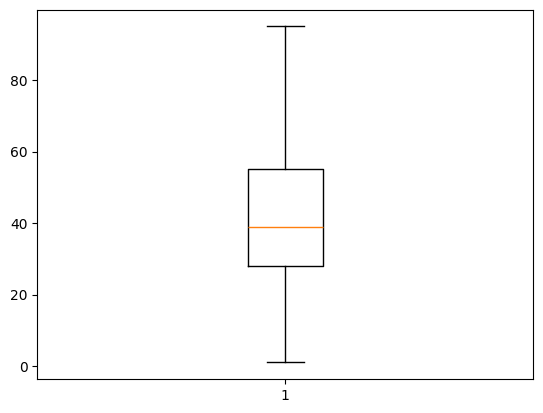

In [46]:
plt.boxplot(df['EDAD'])
plt.show()

Ningún outlier encontrado.

Buscamos outliers en la columna 'NUMERO_VICTIMAS'

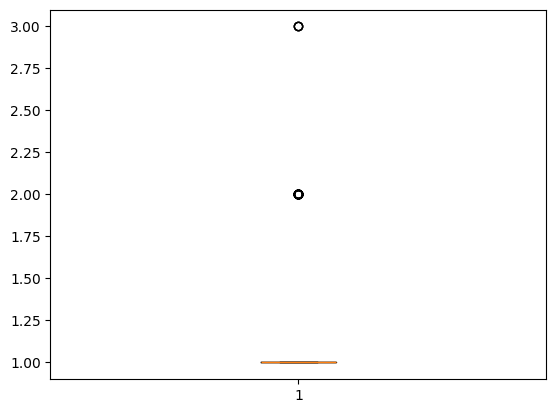

NUMERO_VICTIMAS
1    676
2     38
3      3
Name: count, dtype: int64


In [47]:
plt.boxplot(df['NUMERO_VICTIMAS'])
plt.show()

# Vemos la frecuencia de valores en la columna 'NUMERO_VICTIMAS'
print(df["NUMERO_VICTIMAS"].value_counts())

Debido a que la mayoría de accidentes solo poseen una víctima fatal (676 casos), casos con dos (38 casos) o tres víctimas (solo 3 casos) son más raros y por lo tanto son outliers para el boxplot, pero no son ningún error ni se deben cambiar.

#### **Empezamos con los gráficos de verdad.**  
**1) Primer Gráfico: Distribución de la variable 'EDAD'**

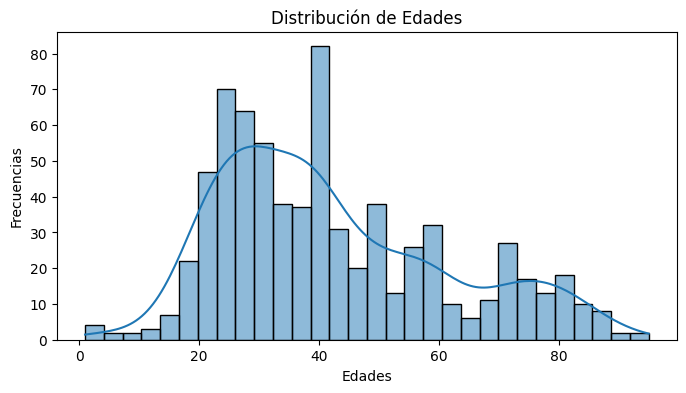

In [48]:
plt.figure(figsize=(8, 4))
sns.histplot(df['EDAD'], kde=True, bins=30)
plt.title('Distribución de Edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencias')
plt.show()

En este gráfico podemos observar que la mayor parte de las víctimas se encuentra entre los 20 y 40 años. Pero la cantidad de casos en mayores o iguales a 50 años es bastante alarmante.

**2) Segundo Gráfico: Cantidad de casos mensuales por año**

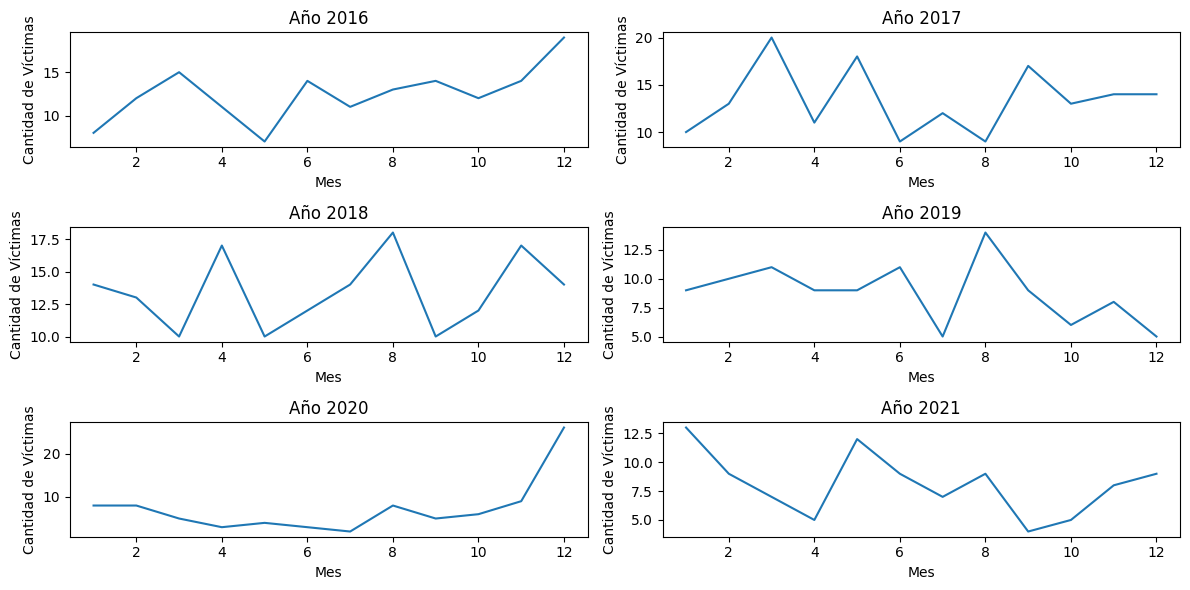

In [49]:
 # Se obtiene una lista de años únicos
años = df['AAAA'].unique()

# Se define el número de filas y columnas para la cuadrícula de subgráficos
n_filas = 3
n_columnas = 2

# Se crea una figura con subgráficos en una cuadrícula de 2x3
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(12, 6))

# Se itera a través de los años y crea un gráfico por año
for i, year in enumerate(años):
    fila = i // n_columnas
    columna = i % n_columnas
    
    # Se filtran los datos para el año actual y agrupa por mes
    data_mensual = (df[df['AAAA'] == year]
                    .groupby('MM')
                    .agg({'NUMERO_VICTIMAS':'sum'}))
    
    # Se configura el subgráfico actual
    ax = axes[fila, columna]
    data_mensual.plot(ax=ax, kind='line')
    ax.set_title('Año ' + str(year)) ; ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Víctimas')
    ax.legend_ = None
    
# Se muestra y acomoda el gráfico
plt.tight_layout()
plt.show()

No se observa ningún patrón aparente entre los casos mensuales por año, solo una disminución de los casos durante la pandemia de diciembre de 2019 hasta agosto de 2020 y su subida en noviembre del mismo año.

**3) Tercer Gráfico: Cantidad de casos por mes**

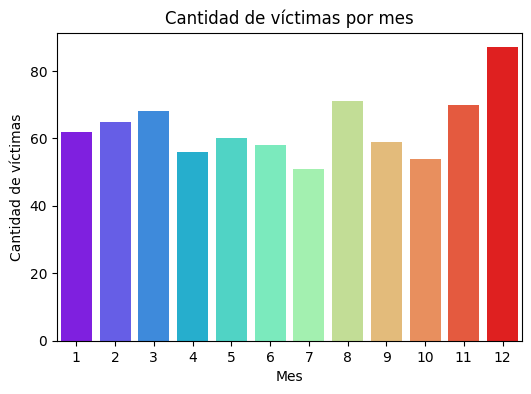

In [50]:
data= df.groupby('MM').agg({'NUMERO_VICTIMAS':'sum'}).reset_index()

#Se realiza el gráfico de barras
plt.figure(figsize=(6,4))
ax= sns.barplot(data=data, x='MM', y='NUMERO_VICTIMAS', palette= plt.cm.rainbow(np.linspace(0,1, len(data))) )
ax.set_title('Cantidad de víctimas por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de víctimas')

#Se muestra el gráfico
plt.show()

Se puede observar que los meses con más víctimas son agosto, noviembre y diciembre co un claro pico de víctimas en diciembre. Y los meses con menos víctimas son julio y octubre.

**4) Cuarto Gráfico: Cantidad de casos por si es un día normal o fin de semana**

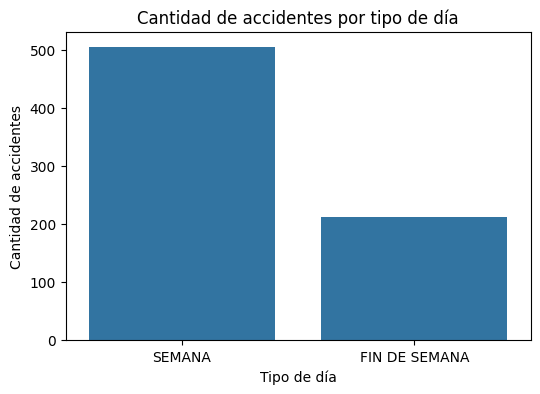

In [51]:
# Se convierte la columna 'fecha' a tipo de dato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d/%m/%Y')

# Se extrae el día de la semana (0 = lunes, 6 = domingo)
df['DIA_SEMANA'] = df['FECHA'].dt.dayofweek

# Se crea una columna 'tipo_dia' para diferenciar entre semana y fin de semana
df['TIPO_DIA'] = df['DIA_SEMANA'].apply(lambda x: 'FIN DE SEMANA' if x >= 5 else 'SEMANA')

# Se cuenta la cantidad de accidentes por tipo de día
data = df['TIPO_DIA'].value_counts().reset_index()
data.columns = ['TIPO_DIA', 'CANTIDAD_ACCIDENTES']

# Se crea el gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='TIPO_DIA', y='CANTIDAD_ACCIDENTES', data=data)

ax.set_title('Cantidad de accidentes por tipo de día') ; ax.set_xlabel('Tipo de día') ; ax.set_ylabel('Cantidad de accidentes')
plt.show()

Se puede observar que la mayoria de los accidentes ocurre durante la semana, aunque podria esto deberse a la acumulación de los cinco días de la semana comparado con solo los dos días del fin de semana. No parece correcto decir que hay una tendencia de accidentes durante la semana.

**5) Quinto Gráfico: Distribución de la variable Sexo**

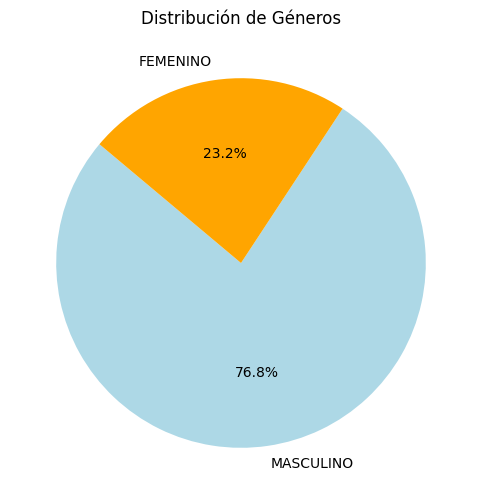

In [52]:
gender_counts = df['SEXO'].value_counts()
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange'])
plt.title('Distribución de Géneros')
plt.ylabel('')  
plt.show()

Podemos observar que la nayoría de las vítimas (76.8%) son hombres y el resto mujeres.

**6) Sexto Gráfico: Cantidad de víctimas por sexo, rol y vehiculo (de la víctima)**

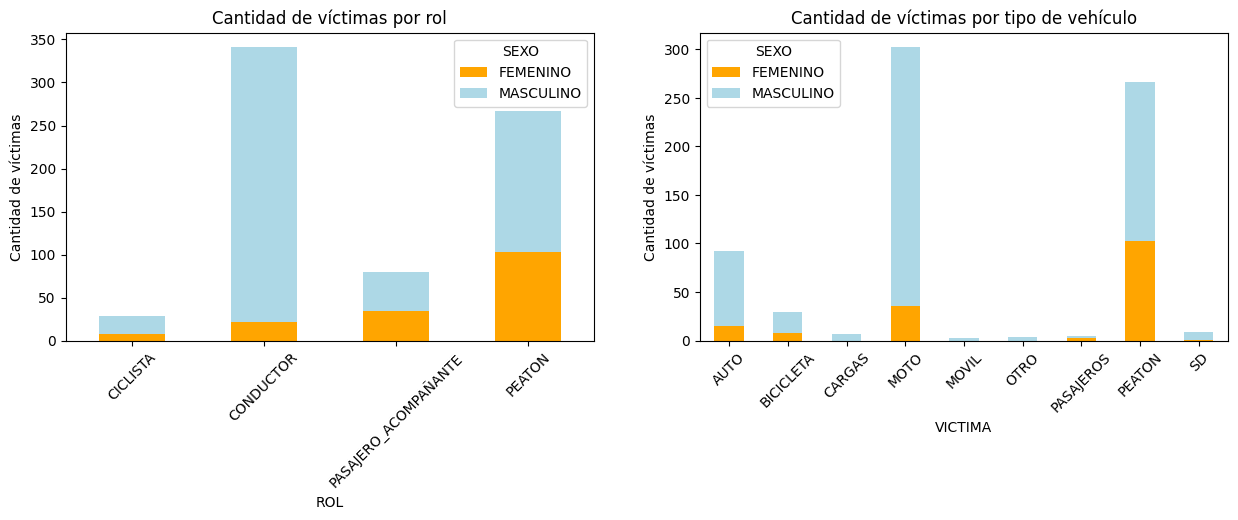

In [53]:
# Se crea el gráfico
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Se definen los colores
colores = ['orange', 'lightblue']

# Gráfico 1: Rol
df_rol = df.groupby(['ROL', 'SEXO']).size().unstack(fill_value=0)
df_rol.plot(kind='bar', stacked=True, ax=axes[0], color=colores)
axes[0].set_title('Cantidad de víctimas por rol') ; axes[0].set_ylabel('Cantidad de víctimas') ; axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Tipo de vehículo
df_victima = df.groupby(['VICTIMA', 'SEXO']).size().unstack(fill_value=0)
df_victima.plot(kind='bar', stacked=True, ax=axes[1], color=colores)
axes[1].set_title('Cantidad de víctimas por tipo de vehículo') ; axes[1].set_ylabel('Cantidad de víctimas') ; axes[1].tick_params(axis='x', rotation=45)

plt.show()   

Se aprecia que el rol más común de las víctimas masculinas es el de conductor mientras que su tipo de vehículo más recurrente es la moto. En cambio el sexo femenino es el rol de peatón o acompañante mientras que es alarmante como el casi mayor número de muertos tanto de hombres como de mujeres es siendo peatones, en este caso la diferencia de sexos es menos pronunciada.

**7) Séptimo Gráfico: Tipos de calles y cruces**

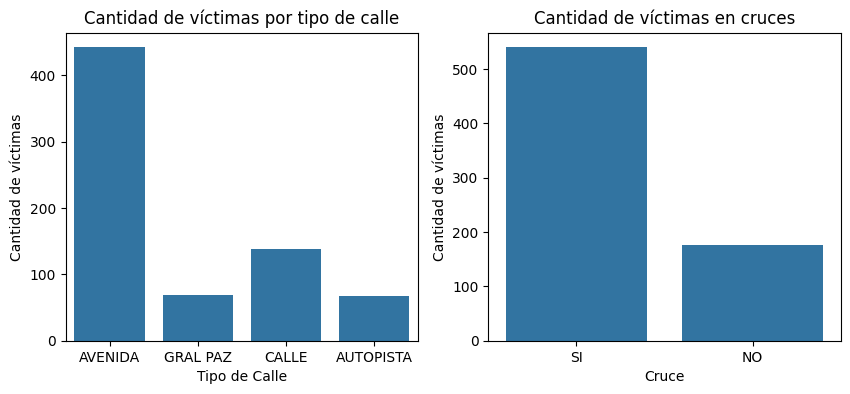

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=df, x='TIPO_DE_CALLE', ax=axes[0])
axes[0].set_title('Cantidad de víctimas por tipo de calle') ; axes[0].set_ylabel('Cantidad de víctimas') ; axes[0].set_xlabel("Tipo de Calle")

sns.countplot(data=df, x='CRUCE', ax=axes[1])
axes[1].set_title('Cantidad de víctimas en cruces') ; axes[1].set_ylabel('Cantidad de víctimas') ; axes[1].set_xlabel("Cruce")

plt.show()

Podemos decir que la mayoría de accidentes ocurren en avenidas y específicamente en cruces, bastante lógico  
pero aquí se ve claramente sin asumir nada.

**8) Octavo Gráfico: Accidentes por Comuna**

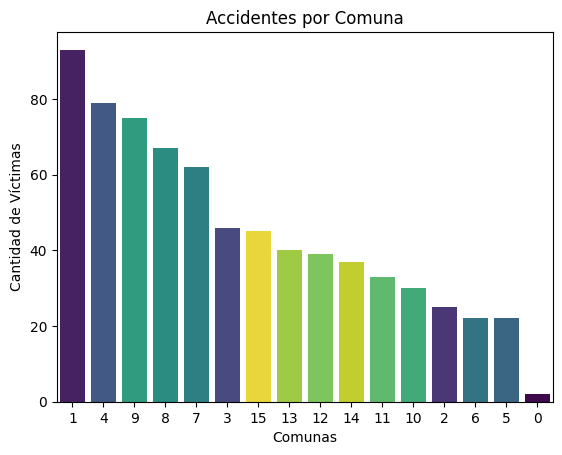

In [55]:
sns.countplot(data=df, x="COMUNA", hue="COMUNA" , palette="viridis", saturation=0.8, order=df["COMUNA"].value_counts().index )
plt.title("Accidentes por Comuna")
plt.ylabel("Cantidad de Víctimas")
plt.xlabel("Comunas")
plt.legend().remove()
plt.show()

Podemos observar que claramente las tres comunas con más accidentes son la 1, 4 (es lógico ya que están en Puerto Madero) y 9, seguidas muy de cerca por la 8 y 7. Debería hacerse un estudio más detallado para saber el por qué exacto de estos resultados.

## <u>**KPI's:**</u>  
Se buscara en este apartado del EDA analizar las KPI's necesarias para este proyecto, empezando en primer lugar por:  

1) **Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.**  

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

Según el censo de 2022 la población de la Ciudad Autónoma de Buenos Aires es: 3.121.707 habitantes 

In [56]:
# Definimos la variable población:
poblacion = 3121707

# Convertimos a datetime la columna "FECHA"
df["FECHA"] = pd.to_datetime(df["FECHA"], format='%d/%m/%Y')

# Obtenemos en una variable la fecha más reciente:
ultima_fecha = df["FECHA"].max()

# Ahora buscaremos obtener nuestro 'semestre más reciente' y compararlo con el semestre anterior
# Guardamos en una nueva varible el fin de este semestre y su inicio:
fin_de_semestre = ultima_fecha
inicio_de_semestre = fin_de_semestre - pd.DateOffset(months=6)

# Ahora buscaremos el inicio y fin del semestre anterior:
fin_de_semestre_anterior = inicio_de_semestre - pd.DateOffset(days=1)
inicio_de_semestre_anterior = fin_de_semestre_anterior - pd.DateOffset(months=6)

# Ahora buscamos los accidentes por semestre:
accidentes_semestre = df[(df['FECHA'] >= inicio_de_semestre) & (df['FECHA'] <= fin_de_semestre)]
accidentes_semestre_anterior = df[(df['FECHA'] >= inicio_de_semestre_anterior) & (df['FECHA'] <= fin_de_semestre_anterior)]

# Obtenemos el número de accidentes por semestre:
num_accidentes_semestre = len(accidentes_semestre)
num_accidentes_semestre_anterior = len(accidentes_semestre_anterior)

# Definimos la tasa de homicidios para cada semestre:
tasa_semestre = (num_accidentes_semestre / poblacion) * 100000
tasa_semestre_anterior = (num_accidentes_semestre_anterior / poblacion) * 100000

# Definimos el cambio porcentual entre semestres: 
# ((Tasa del último semestre − Tasa del semestre anterior) / Tasa del semestre anterior) * 100
diferencia_porcentual_semestres = ((tasa_semestre - tasa_semestre_anterior) / tasa_semestre_anterior) * 100

# Imprimimos nuestros hallazgos:
print(f"Periodo de este (último) semestre, inicio: |{inicio_de_semestre}|, hasta |{fin_de_semestre}|")
print(f"Periodo del semestre anterior al último, inicio: |{inicio_de_semestre_anterior}|, hasta |{fin_de_semestre_anterior}| \n")
print(f"Número de accidentes en el último semestre: {num_accidentes_semestre}")
print(f"Número de accidentes en el semestre anterior: {num_accidentes_semestre_anterior} \n")
print(f"Tasa de homicidios por cada 100 mil habitantes en el último semestre: {round(tasa_semestre, 4)}")
print(f"Tasa de homicidios por cada 100 mil habitantes en el semestre anterior: {round(tasa_semestre_anterior, 4)} \n")
print(f"Cambio porcentual entre el último semestre en comparación con el semestre anterior: {round(diferencia_porcentual_semestres, 2)}%")

Periodo de este (último) semestre, inicio: |2021-06-30 00:00:00|, hasta |2021-12-30 00:00:00|
Periodo del semestre anterior al último, inicio: |2020-12-29 00:00:00|, hasta |2021-06-29 00:00:00| 

Número de accidentes en el último semestre: 42
Número de accidentes en el semestre anterior: 55 

Tasa de homicidios por cada 100 mil habitantes en el último semestre: 1.3454
Tasa de homicidios por cada 100 mil habitantes en el semestre anterior: 1.7619 

Cambio porcentual entre el último semestre en comparación con el semestre anterior: -23.64%


Como podemos observar la diferencia entre ambos semestres es la reducción en un 23.64% de las victimas en accidentes fatales en este último semestre, comparado con el semestre anterior, por lo tanto **si se logro** el objetivo.

In [57]:
objetivo_reduccion = -10
kpi_cumplimiento = diferencia_porcentual_semestres <= objetivo_reduccion
resultado = (kpi_cumplimiento, round(diferencia_porcentual_semestres, 2))
print(f"Resultado de la KPI: {resultado}")

Resultado de la KPI: (True, -23.64)


2) **Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.**

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es:   

**Esta fórmula esta mal :(**  
((Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / Número de accidentes mortales con víctimas en moto en el año anterior) * 100  

**Esta fórmula esta bien :)**  
((Número de accidentes mortales con víctimas en moto en el año actual - Número de accidentes mortales con víctimas en moto en el año anterior) / Número de accidentes mortales con víctimas en moto en el año anterior) * 100

La fórmula que nos entregaron al usarla me daba un número negativo, como si hubiera una reducción, pero en cambio el número de víctimas en moto en el último año ha aumentado. En la otra fórmula que dice que esta bien solo intercambie dos elementos para que esta sea correcta.

In [58]:
# Convertimos a datetime la columna "FECHA"
df["FECHA"] = pd.to_datetime(df["FECHA"], format='%d/%m/%Y')

# Obtenemos en una variable la fecha más reciente:
ultima_fecha = df["FECHA"].max()

# Obtenemos el año más reciente (último):
fin_anio = ultima_fecha
inicio_anio = fin_anio - pd.DateOffset(years=1)

# Obtenemos el año anterior al último año:
fin_anio_anterior = inicio_anio - pd.DateOffset(days=1)
inicio_anio_anterior = fin_anio_anterior - pd.DateOffset(years=1)

# Obtenemos un dataframe donde solo estan las victiams que son MOTOS
df_moto = df[df["VICTIMA"] == "MOTO"]

# Guardamos en una variable la cantidad de víctimas para cada año:
moto_accidentes_anio = df_moto[(df_moto["FECHA"] >= inicio_anio) & (df_moto["FECHA"] <= fin_anio)]
moto_accidentes_anio_anterior = df_moto[(df_moto["FECHA"] >= inicio_anio_anterior) & (df_moto["FECHA"] <= fin_anio_anterior)]

# Obtenemos el número de accidentes por año:
num_accidentes_anio = len(moto_accidentes_anio)
num_accidentes_anio_anterior = len(moto_accidentes_anio_anterior)

# Definimos el cambio porcentual entre años: 
# ((Número de accidentes mortales con víctimas en moto en el año actual - Número de accidentes mortales con víctimas en moto en el año anterior) 
# / Número de accidentes mortales con víctimas en moto en el año anterior) * 100 
diferencia_porcentual_anios = ((num_accidentes_anio - num_accidentes_anio_anterior) / num_accidentes_anio_anterior) * 100

# Imprimimos nuestros hallazgos:
print(f"Periodo último año, inicio: |{inicio_anio}| hasta |{fin_anio}|")
print(f"Periodo año anterior al último, inicio: |{inicio_anio_anterior} hasta |{fin_anio_anterior}| \n")
print(f"Número de accidentes fatales en moto durante el último año: {num_accidentes_anio}")
print(f"Número de accidentes fatales en moto durante el año anterior: {num_accidentes_anio_anterior} \n")
print(f"Cambio porcentual entre el último año en comparación con el año anterior: {round(diferencia_porcentual_anios, 2)}%")

Periodo último año, inicio: |2020-12-30 00:00:00| hasta |2021-12-30 00:00:00|
Periodo año anterior al último, inicio: |2019-12-29 00:00:00 hasta |2020-12-29 00:00:00| 

Número de accidentes fatales en moto durante el último año: 46
Número de accidentes fatales en moto durante el año anterior: 28 

Cambio porcentual entre el último año en comparación con el año anterior: 64.29%


Como podemos observar la diferencia entre ambos años es el incremento en un 64.29% de las victimas en moto durante accidentes fatales en este último año 2020-2021, comparado con el año anterior, por lo tanto **no se logro** el objetivo.

In [59]:
objetivo_reduccion = -7
kpi_cumplimiento = diferencia_porcentual_anios <= objetivo_reduccion
resultado = (kpi_cumplimiento, round(diferencia_porcentual_anios, 2))
print(f"Resultado de la KPI: {resultado}")

Resultado de la KPI: (False, 64.29)


Como solución a esta problemática se me ocurren ciertas propuestas: 
1) Análisis detallado de accidentes: Realizar un análisis detallado de los accidentes fatales de moto ocurridos durante el último año para identificar patrones, causas comunes y áreas de mayor riesgo.

2) Capacitación y concienciación: Proporcionar capacitación adicional para conductores de motocicletas, enfocada en prácticas seguras de conducción, respeto a las normas de tránsito y concienciación sobre los riesgos asociados.

3) Educación vial: Llevar a cabo campañas de concienciación pública sobre la importancia de compartir la carretera de manera segura, incluyendo la promoción del uso de cascos, chalecos reflectantes y otros equipos de protección personal.

4) Vigilancia y aplicación de la ley: Reforzar la vigilancia policial en áreas de alta incidencia de accidentes de moto, y asegurar la aplicación efectiva de las leyes de tránsito, especialmente en lo que respecta al uso de cascos y otros requisitos de seguridad.